<a href="https://colab.research.google.com/github/singhsourav0/Deep-Learning-Odyssey/blob/main/CIFAR10_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<!DOCTYPE html>
<html lang="en">
<head>
<meta charset="UTF-8">
<meta name="viewport" content="width=device-width, initial-scale=1.0">
<title>Image Classification Using Convolutional Neural Networks</title>
<style>
  body {
    font-family: Arial, sans-serif;
  }
  .container {
    max-width: 800px;
    margin: auto;
    padding: 20px;
    background-color: #f5f5dc; /* clay color */
    border-radius: 10px;
  }
  h1 {
    color: #8b4513; /* saddle brown color */
  }
  p {
    color: #696969; /* dim gray color */
  }
</style>
</head>
<body>

<div class="container">
  <h1>Image Classification Using Convolutional Neural Networks</h1>
  <p>In this Notebook, we will demonstrate how to perform image classification using the CIFAR-10 dataset in TensorFlow. We will begin by training a model using a simple Artificial Neural Network (ANN) and then compare its performance with a Convolutional Neural Network (CNN).</p>
  <p>First, we will train a model with an ANN to establish a baseline accuracy. Then, we will implement a CNN and observe how its performance improves over the ANN model. This tutorial aims to provide insights into why CNNs are preferred over ANNs for image classification tasks.</p>
  <h2>Instructions:</h2>
  <ol>
    <li>Load the CIFAR-10 dataset.</li>
    <li>Preprocess the data.</li>
    <li>Construct a simple ANN model and train it on the dataset.</li>
    <li>Evaluate the performance of the ANN model.</li>
    <li>Build a CNN model and train it on the same dataset.</li>
    <li>Compare the accuracy of the CNN model with the ANN model.</li>
  </ol>
  <p>By following these steps, you will gain a better understanding of the advantages of using CNNs for image classification tasks.</p>
</div>

</body>
</html>


In [5]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [6]:
(x_train, y_train),(x_test,y_test)= datasets.cifar10.load_data()

170498071/170498071 [==============================] - 3s 0us/step


In [7]:
x_train.shape

(50000, 32, 32, 3)

In [8]:
x_test.shape

(10000, 32, 32, 3)

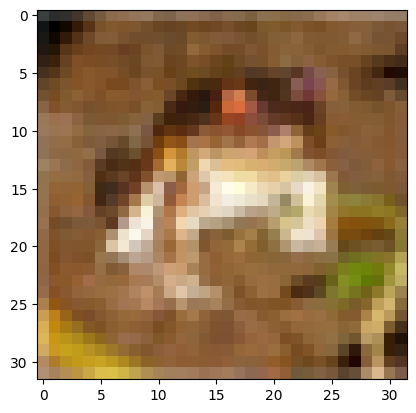

In [11]:
plt.imshow(x_train[0])

In [12]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [13]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [14]:

y_test = y_test.reshape(-1,)

In [15]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [16]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

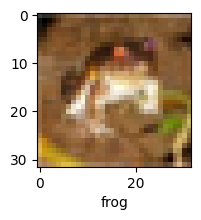

In [18]:
plot_sample(x_train, y_train, 0)

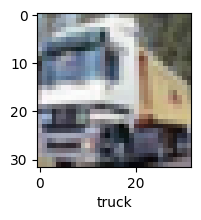

In [20]:
plot_sample(x_train, y_train, 1)

normalizing the data into 0 to 1 and the image is in rgb . so the range of number of element in matrices is from 0 to 255 .so we will divide all no from 255


In [22]:
X_train = x_train / 255.0
X_test = x_test / 255.0

first we build ANN model to check our model accuracy just for knowledge check

In [23]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 157s 100ms/step - loss: 1.8103 - accuracy: 0.3546
Epoch 2/5
1563/1563 [==============================] - 140s 90ms/step - loss: 1.6229 - accuracy: 0.4277
Epoch 3/5
1563/1563 [==============================] - 155s 99ms/step - loss: 1.5419 - accuracy: 0.4570
Epoch 4/5
1563/1563 [==============================] - 157s 101ms/step - loss: 1.4802 - accuracy: 0.4776
Epoch 5/5
1563/1563 [==============================] - 152s 98ms/step - loss: 1.4339 - accuracy: 0.4932


In [24]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 8s 26ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.73      0.35      0.47      1000
           1       0.63      0.57      0.60      1000
           2       0.39      0.31      0.35      1000
           3       0.35      0.16      0.22      1000
           4       0.52      0.27      0.36      1000
           5       0.24      0.74      0.36      1000
           6       0.58      0.40      0.48      1000
           7       0.64      0.41      0.50      1000
           8       0.59      0.65      0.62      1000
           9       0.51      0.66      0.58      1000

    accuracy                           0.45     10000
   macro avg       0.52      0.45      0.45     10000
weighted avg       0.52      0.45      0.45     10000



Now let us build a convolutional neural network to train our images

In [25]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [26]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [27]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 64s 40ms/step - loss: 1.4633 - accuracy: 0.4762
Epoch 2/10
1563/1563 [==============================] - 58s 37ms/step - loss: 1.1184 - accuracy: 0.6050
Epoch 3/10
1563/1563 [==============================] - 65s 41ms/step - loss: 0.9939 - accuracy: 0.6516
Epoch 4/10
1563/1563 [==============================] - 57s 36ms/step - loss: 0.9139 - accuracy: 0.6812
Epoch 5/10
1563/1563 [==============================] - 56s 36ms/step - loss: 0.8530 - accuracy: 0.7048
Epoch 6/10
1563/1563 [==============================] - 55s 35ms/step - loss: 0.7975 - accuracy: 0.7228
Epoch 7/10
1563/1563 [==============================] - 55s 35ms/step - loss: 0.7470 - accuracy: 0.7417
Epoch 8/10
1563/1563 [==============================] - 64s 41ms/step - loss: 0.7065 - accuracy: 0.7551
Epoch 9/10
1563/1563 [==============================] - 56s 36ms/step - loss: 0.6668 - accuracy: 0.7680
Epoch 10/10
1563/1563 [==============================] - 57s 37m

In [28]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 3s 11ms/step - loss: 0.9243 - accuracy: 0.7001


[0.9242792725563049, 0.7001000046730042]

In [29]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 4s 13ms/step


array([[2.1109325e-03, 3.5674970e-05, 5.9412206e-03, 7.7377468e-01,
        1.6946128e-03, 2.4995588e-02, 1.8682975e-01, 8.0899626e-05,
        4.5201136e-03, 1.6603792e-05],
       [6.1851827e-04, 3.1935781e-02, 4.3519476e-06, 6.3978058e-07,
        4.7274941e-07, 2.8981679e-08, 8.6588855e-08, 1.6249241e-09,
        9.6550214e-01, 1.9380397e-03],
       [1.6163221e-01, 5.2683871e-02, 2.6337747e-03, 4.2595170e-03,
        1.8743634e-03, 2.1438130e-04, 2.9398821e-04, 2.7976141e-04,
        7.6040989e-01, 1.5718209e-02],
       [9.5396316e-01, 7.4439049e-03, 9.2174616e-03, 4.2026045e-04,
        5.5416586e-04, 4.1522762e-06, 8.5797737e-06, 3.6508944e-05,
        2.7880350e-02, 4.7134230e-04],
       [4.3608402e-06, 3.0715776e-06, 5.9406646e-02, 3.4905761e-01,
        2.0792387e-01, 2.8578013e-02, 3.5491559e-01, 3.1196341e-05,
        7.9397032e-05, 1.0983546e-07]], dtype=float32)

In [30]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 6]

In [31]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

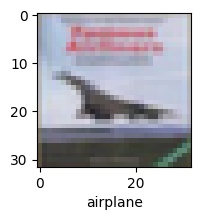

In [32]:
plot_sample(X_test, y_test,3)

In [33]:
classes[y_classes[3]]

'airplane'

In [34]:
classes[y_classes[3]]

'airplane'

 <p style="color: #7e4a27;">Singhsourav0 </p>